# **Demonstration of various data preparation techniques**

Datasets - 
1. https://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region
2. https://www.kaggle.com/datasets/ayessa/bike-sharing-dataset-regression

In [ ]:
# Installation
!pip install opendatasets
!pip install autoimpute

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.1 MB/s 
     |████████████████████████████████| 872 kB 5.3 MB/s 
     |████████████████████████████████| 1.8 MB 16.8 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=8c470b37e7876206f2e6325b807f5595b07220a11a6947fb5345f3282ca97adc
  Stored in directory: /root/.cache/pip/wheels/f3/af/8c/5dd7553522d74c52a7813806fc7ee1a9caa20a3f7c8fd850d5
Successfully built theano-pymc


In [ ]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import opendatasets as od

from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
!gdown 12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD

Downloading...
From: https://drive.google.com/uc?id=12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 7.17kB/s]


In [ ]:
od.download('https://www.kaggle.com/datasets/PROPPG-PPG/hourly-weather-surface-brazil-southeast-region')
od.download('https://www.kaggle.com/datasets/ayessa/bike-sharing-dataset-regression')

100%|██████████| 1.58G/1.58G [00:12<00:00, 138MB/s]


100%|██████████| 21.2k/21.2k [00:00<00:00, 5.01MB/s]

In [ ]:
# Read data
climate_df = pd.read_csv('/content/hourly-weather-surface-brazil-southeast-region/north.csv')
bikerents_df = pd.read_csv('/content/bike-sharing-dataset-regression/day.csv')

## Exploratory Data Analysis

In [ ]:
climate_df.head()

,index,Data,Hora,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",region,state,station,station_code,latitude,longitude,height
0,0,2000-05-09,00:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
1,1,2000-05-09,01:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
2,2,2000-05-09,02:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
3,3,2000-05-09,03:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25
4,4,2000-05-09,04:00,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999,-9999,-9999,-9999,-9999.0,-9999.0,N,AM,MANAUS,A101,-3.103333,-60.016389,61.25


-9999 implies missing values which we will impute in later steps

In [ ]:
climate_df.shape

(8392320, 27)

In [ ]:
climate_df.dtypes

index                                                      int64
Data                                                      object
Hora                                                      object
PRECIPITAÇÃO TOTAL, HORÁRIO (mm)                         float64
PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)    float64
PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)          float64
PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)         float64
RADIACAO GLOBAL (Kj/m²)                                    int64
TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)             float64
TEMPERATURA DO PONTO DE ORVALHO (°C)                     float64
TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)               float64
TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)         float64
TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)         float64
UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)                   int64
UMIDADE REL. MIN. NA HORA

In [ ]:
climate_df.describe()

,index,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",latitude,longitude,height
count,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06,8.392320e+06
mean,1.728984e+05,-2.368686e+03,-1.091195e+03,-1.099674e+03,-1.100162e+03,-4.753662e+03,-1.826682e+03,-2.016026e+03,-1.834738e+03,-1.835557e+03,-2.024679e+03,-2.027631e+03,-1.971403e+03,-1.980950e+03,-1.972319e+03,-2.082307e+03,-2.154196e+03,-2.141020e+03,-5.747661e+00,-5.533825e+01,-1.685074e+02
std,1.167873e+05,4.251535e+03,4.308733e+03,4.315761e+03,4.315489e+03,5.871869e+03,3.891501e+03,4.032835e+03,3.898670e+03,3.898081e+03,4.039704e+03,4.040888e+03,4.057146e+03,4.058819e+03,4.055221e+03,4.207228e+03,4.114295e+03,4.102944e+03,3.982830e+00,7.705193e+00,1.812283e+03
min,0.000000e+00,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-1.275056e+01,-7.278667e+01,-9.999000e+03
25%,6.913500e+04,0.000000e+00,9.744000e+02,9.745000e+02,9.738000e+02,-9.999000e+03,2.210000e+01,1.490000e+01,2.240000e+01,2.180000e+01,1.550000e+01,1.410000e+01,4.600000e+01,3.900000e+01,4.200000e+01,1.300000e+01,0.000000e+00,0.000000e+00,-8.968611e+00,-6.062833e+01,5.500000e+01
50%,1.593680e+05,0.000000e+00,9.915000e+02,9.917000e+02,9.911000e+02,-9.999000e+03,2.470000e+01,2.160000e+01,2.510000e+01,2.430000e+01,2.200000e+01,2.110000e+01,7.800000e+01,7.000000e+01,7.400000e+01,8.900000e+01,2.200000e+00,6.000000e-01,-5.365833e+00,-5.186250e+01,1.110000e+02
75%,2.688480e+05,0.000000e+00,1.004000e+03,1.004300e+03,1.003700e+03,9.530000e+02,2.810000e+01,2.290000e+01,2.900000e+01,2.730000e+01,2.330000e+01,2.250000e+01,9.100000e+01,8.800000e+01,9.000000e+01,2.030000e+02,4.500000e+00,1.700000e+00,-2.640556e+00,-4.847861e+01,2.200000e+02
max,4.203920e+05,9.720000e+01,1.050000e+03,1.049800e+03,1.050000e+03,4.530500e+04,4.220000e+01,4.350000e+01,4.500000e+01,4.500000e+01,4.440000e+01,3.980000e+01,1.000000e+02,1.000000e+02,1.000000e+02,3.600000e+02,9.970000e+01,1.990000e+01,4.477500e+00,-4.592000e+01,7.980000e+02


The scale of features is quite varying. Scaling needs to be performed.

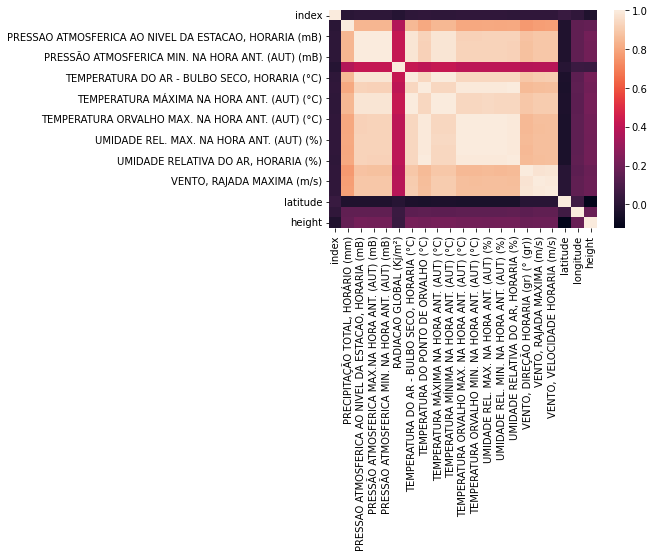

In [ ]:
sns.heatmap(climate_df.corr())

There exists high correlation between almost all variables. This adds to redundancy and possible overfitting. Hence, feature selection will need to be performed.

In [ ]:
bikerents_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
bikerents_df.shape

(731, 16)

In [ ]:
bikerents_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [ ]:
bikerents_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
bikerents_df.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

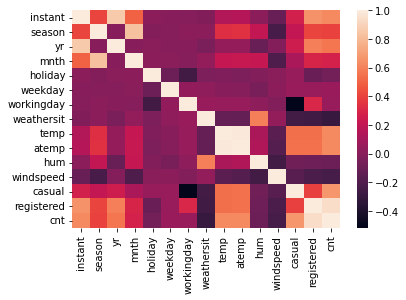

In [ ]:
sns.heatmap(bikerents_df.corr())

## Data Preparation

In [ ]:
# Sampling climate_df due to computation retraints
climate_df = climate_df.sample(frac = 0.005)
climate_df.shape

(41962, 27)

In [ ]:
climate_df.rename(columns = 
                  {'Data' : 'date', 'Hora' : 'hour', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)' : 'precipitation', 
                   'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)' : 'atm_pressure', 
                   'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)' : 'max_air_pressure', 
                   'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)' : 'min_air_pressure', 
                   'RADIACAO GLOBAL (Kj/m²)' : 'solar', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)' : 'air_temp', 
                   'TEMPERATURA DO PONTO DE ORVALHO (°C)' : 'dew_temp','TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)' : 'max_temp', 
                   'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)' : 'min_temp', 'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)' : 'max_dew_temp', 
                   'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)' : 'min_dew_temp', 'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)' : 'max_humid', 
                   'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)' : 'min_humid', 'UMIDADE RELATIVA DO AR, HORARIA (%)' : 'rel_humid',
                   'VENTO, DIREÇÃO HORARIA (gr) (° (gr))' : 'wind_dir', 'VENTO, RAJADA MAXIMA (m/s)' : 'wind_gust', 
                   'VENTO, VELOCIDADE HORARIA (m/s)' : 'wind_speed'}, inplace = True)

In [ ]:
climate_df.columns

Index(['index', 'date', 'hour', 'precipitation', 'atm_pressure',
       'max_air_pressure', 'min_air_pressure', 'solar', 'air_temp', 'dew_temp',
       'max_temp', 'min_temp', 'max_dew_temp', 'min_dew_temp', 'max_humid',
       'min_humid', 'rel_humid', 'wind_dir', 'wind_gust', 'wind_speed',
       'region', 'state', 'station', 'station_code', 'latitude', 'longitude',
       'height'],
      dtype='object')

In [ ]:
climate_df.drop(['index'], inplace = True, axis = 1)

In [ ]:
y = climate_df[['air_temp']]
X = climate_df[['precipitation', 'atm_pressure', 'max_air_pressure', 'min_air_pressure', 'solar', 'dew_temp', 'max_temp', 'min_temp', 'max_dew_temp', 
                'min_dew_temp', 'max_humid', 'min_humid', 'rel_humid', 'wind_dir', 'wind_gust', 'wind_speed', 'latitude', 'longitude', 'height']]

**Feature subset selection**

Pearson Correlation

In [ ]:
cor_target = abs(climate_df.corr('pearson')['air_temp'])
highly_correlated_features = cor_target[cor_target > 0.7]
highly_correlated_features_list = highly_correlated_features.keys().to_list()
climate_df_reduced = climate_df.drop(highly_correlated_features_list, axis = 1)

In [ ]:
climate_df_reduced.head()

,date,hour,solar,region,state,station,station_code,latitude,longitude,height
5489632,2017-06-14,05:00,-9999,N,PA,TUCUMA,A234,-6.743611,-51.142222,317.0
172297,2007-02-20,01:00,-9999,N,TO,PALMAS,A009,-10.183333,-48.300000,280.0
267878,2008-12-03,14:00,962,N,RO,VILHENA,A938,-12.734722,-60.157778,590.0
5732123,2017-06-08,23:00,-9999,N,TO,PEDRO AFONSO,A020,-8.968611,-48.194167,189.0
6337614,2018-02-05,14:00,0,N,AM,DTCEA TEFE,S117,-3.377222,-64.723056,-9999.0


Almost all temperature, humidity and wind features are highly correlated with the target variable and hence pearson correlation coefficient removes all the highly related features.

Lasso

In [ ]:
lasso = linear_model.Lasso(alpha = 0.1).fit(X, y)
model = SelectFromModel(lasso, prefit = True)
X_new = model.transform(X)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.905e+08, tolerance: 6.447e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
X_new.shape

(41962, 19)

Using LASSO, the number of features selected is 19 out of 27. These 19 feature combinations give the highest score.

Recursive Feature Elimination

In [ ]:
RFE_regressor = LinearRegression()
rfe = RFE(RFE_regressor)
X_rfe = rfe.fit_transform(X, y)  
RFE_regressor.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True  True False  True  True  True  True False False False
 False False False False  True  True False]
[ 8  1  1  1 11  1  1  1  1  4  7  3  2 10  6  5  1  1  9]


Using RFE, we see that features with ranking 1 are the most important and importance decreases thereon. Similarly, support = True implies relevant features. We can choose top 'x' features by calculating regression accuracy/score using these features and determine which features to keep and which to discard.

In [ ]:
relevant_features = []
support = list(rfe.support_)
numeric = ['precipitation', 'atm_pressure', 'max_air_pressure', 'min_air_pressure', 'solar', 'air_temp', 'dew_temp', 'max_temp', 'min_temp', 'max_dew_temp', 'min_dew_temp', 'max_humid', 
    'min_humid', 'rel_humid', 'wind_dir', 'wind_gust', 'wind_speed', 'height']
for i,f in enumerate(numeric):
  if support[i]:
    relevant_features.append(f)

**Imputing missing values**

Mice Imputer

In [ ]:
climate_df_fs = climate_df[relevant_features].copy()
climate_df_fs = climate_df_fs.replace(-9999, np.nan)

In [ ]:
climate_df_fs.shape

(41962, 9)

In [ ]:
climate_df_fs.head(20)

,atm_pressure,max_air_pressure,min_air_pressure,air_temp,dew_temp,max_temp,min_temp,wind_speed,height
5489632,977.0,977.3,977.0,21.3,20.6,21.8,21.3,0.3,317.00
172297,977.4,977.4,976.6,23.3,21.4,23.4,23.3,0.8,280.00
267878,946.5,946.9,946.5,20.9,18.6,20.9,19.4,2.5,590.00
5732123,990.1,990.1,989.7,25.7,22.3,26.7,25.6,0.0,189.00
6337614,1004.4,1004.4,1004.0,29.3,26.7,29.3,27.9,1.0,NaN
6027587,1003.4,1003.7,1003.4,24.4,23.0,24.5,24.1,0.6,90.00
7229233,1001.6,1002.2,1001.6,23.9,21.2,24.0,23.9,NaN,100.76
909162,1000.8,1000.8,1000.5,24.6,22.6,25.0,24.6,2.3,108.00
5484704,975.6,975.8,974.4,25.2,23.7,26.0,25.2,1.0,261.00
72574,1001.5,1001.5,1001.0,28.7,22.4,29.0,28.7,1.6,61.25


In [ ]:
estimator = RandomForestRegressor(max_depth = 3)
mice = IterativeImputer(estimator = estimator, random_state = 101)
climate_df_mice = mice.fit_transform(climate_df_fs)
climate_df_imputed = pd.DataFrame(climate_df_mice, columns = relevant_features)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
climate_df_imputed.isna().sum()

atm_pressure        0
max_air_pressure    0
min_air_pressure    0
air_temp            0
dew_temp            0
max_temp            0
min_temp            0
wind_speed          0
height              0
dtype: int64

In [ ]:
climate_df_imputed.head(20)

,atm_pressure,max_air_pressure,min_air_pressure,air_temp,dew_temp,max_temp,min_temp,wind_speed,height
0,977.000000,977.300000,977.000000,21.300000,20.600000,21.800000,21.300000,0.300000,317.00000
1,977.400000,977.400000,976.600000,23.300000,21.400000,23.400000,23.300000,0.800000,280.00000
2,946.500000,946.900000,946.500000,20.900000,18.600000,20.900000,19.400000,2.500000,590.00000
3,990.100000,990.100000,989.700000,25.700000,22.300000,26.700000,25.600000,0.000000,189.00000
4,1004.400000,1004.400000,1004.000000,29.300000,26.700000,29.300000,27.900000,1.000000,46.18727
5,1003.400000,1003.700000,1003.400000,24.400000,23.000000,24.500000,24.100000,0.600000,90.00000
6,1001.600000,1002.200000,1001.600000,23.900000,21.200000,24.000000,23.900000,0.717324,100.76000
7,1000.800000,1000.800000,1000.500000,24.600000,22.600000,25.000000,24.600000,2.300000,108.00000
8,975.600000,975.800000,974.400000,25.200000,23.700000,26.000000,25.200000,1.000000,261.00000
9,1001.500000,1001.500000,1001.000000,28.700000,22.400000,29.000000,28.700000,1.600000,61.25000


Mice Imputation filled all the nulls for the relevant features

**Scaling and feature portability**

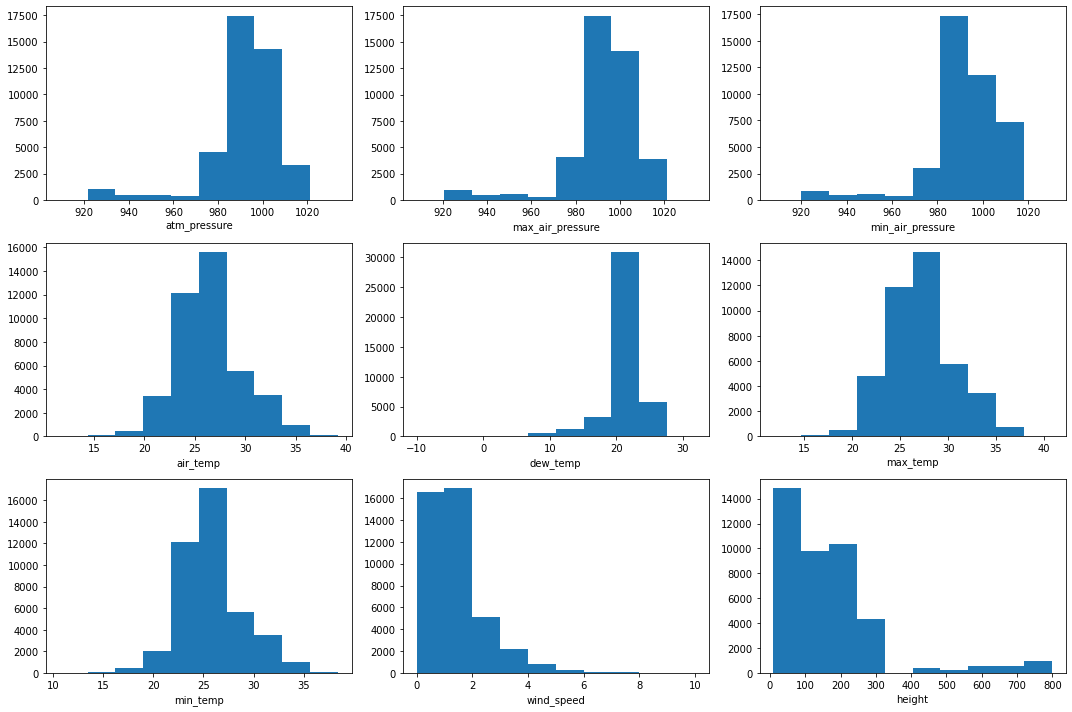

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (15, 10))
cols = list(climate_df_imputed.columns)
c = 0

for row in range(3):
  for col in range(3):
    axes[row, col].hist(data = climate_df_imputed, x = cols[c])
    axes[row, col].set_xlabel(cols[c])
    c += 1
plt.tight_layout()
plt.show()

In [ ]:
# Standard Scaler - mean 0 and variance 1
sc = StandardScaler()
sc_fit = sc.fit_transform(climate_df_imputed)
climate_df_imputed_scaled = pd.DataFrame(sc_fit)
climate_df_imputed_scaled.head()

,0,1,2,3,4,5,6,7,8
0,-0.966609,-0.967113,-0.947032,-1.525924,-0.257287,-1.484365,-1.438887,-0.850784,0.990711
1,-0.941430,-0.960822,-0.972229,-0.920240,0.014317,-1.024728,-0.795609,-0.399849,0.750141
2,-2.886474,-2.879640,-2.868285,-1.647061,-0.936295,-1.742911,-2.050000,1.133328,2.765732
3,-0.142011,-0.161838,-0.147035,-0.193420,0.319871,-0.076726,-0.055840,-1.121344,0.158468
4,0.758123,0.737804,0.753749,0.896810,1.813691,0.670184,0.683928,-0.219476,-0.770087


In [ ]:
# MinMax Scaler - [0,1]
sc = MinMaxScaler()
sc_fit = sc.fit_transform(climate_df_imputed)
climate_df_imputed_scaled = pd.DataFrame(sc_fit)
climate_df_imputed_scaled.head()

,0,1,2,3,4,5,6,7,8
0,0.544944,0.550239,0.565004,0.351449,0.732057,0.344828,0.382671,0.03,0.389656
1,0.548154,0.551037,0.561733,0.423913,0.751196,0.400000,0.454874,0.08,0.342706
2,0.300161,0.307815,0.315617,0.336957,0.684211,0.313793,0.314079,0.25,0.736067
3,0.650080,0.652313,0.668847,0.510870,0.772727,0.513793,0.537906,0.00,0.227236
4,0.764848,0.766348,0.785773,0.641304,0.877990,0.603448,0.620939,0.10,0.046020


In [ ]:
# Zscore
def z_score_standardization(series):
    return (series - series.mean()) / series.std()

climate_df_imputed_z = climate_df_imputed.copy(deep = True)
for col in climate_df_imputed.columns:
    climate_df_imputed_z[col] = z_score_standardization(climate_df_imputed[col])

climate_df_imputed_z.head()

,atm_pressure,max_air_pressure,min_air_pressure,air_temp,dew_temp,max_temp,min_temp,wind_speed,height
0,-0.966597,-0.967102,-0.947021,-1.525906,-0.257283,-1.484347,-1.438870,-0.850774,0.990700
1,-0.941419,-0.960810,-0.972217,-0.920229,0.014317,-1.024715,-0.795600,-0.399845,0.750132
2,-2.886440,-2.879606,-2.868251,-1.647041,-0.936284,-1.742890,-2.049976,1.133314,2.765699
3,-0.142009,-0.161836,-0.147034,-0.193418,0.319867,-0.076725,-0.055840,-1.121331,0.158466
4,0.758114,0.737796,0.753740,0.896799,1.813669,0.670177,0.683920,-0.219473,-0.770078


In [ ]:
# Binning latitude and longitude
climate_df['latitude'] = pd.qcut(climate_df['latitude'], 5)
climate_df['longitude'] = pd.qcut(climate_df['longitude'], 5)
climate_df.head()

,date,hour,precipitation,atm_pressure,max_air_pressure,min_air_pressure,solar,air_temp,dew_temp,max_temp,min_temp,max_dew_temp,min_dew_temp,max_humid,min_humid,rel_humid,wind_dir,wind_gust,wind_speed,region,state,station,station_code,latitude,longitude,height
5489632,2017-06-14,05:00,0.0,977.0,977.3,977.0,-9999,21.3,20.6,21.8,21.3,20.9,20.6,96,95,96,38,1.1,0.3,N,PA,TUCUMA,A234,"(-7.124, -3.844]","(-57.674, -49.926]",317.0
172297,2007-02-20,01:00,0.0,977.4,977.4,976.6,-9999,23.3,21.4,23.4,23.3,21.5,21.3,89,88,89,85,1.7,0.8,N,TO,PALMAS,A009,"(-12.751999999999999, -9.793]","(-49.926, -48.3]",280.0
267878,2008-12-03,14:00,0.8,946.5,946.9,946.5,962,20.9,18.6,20.9,19.4,18.9,18.2,93,86,87,160,5.7,2.5,N,RO,VILHENA,A938,"(-12.751999999999999, -9.793]","(-62.962, -57.674]",590.0
5732123,2017-06-08,23:00,0.0,990.1,990.1,989.7,-9999,25.7,22.3,26.7,25.6,22.5,20.8,82,72,82,48,0.0,0.0,N,TO,PEDRO AFONSO,A020,"(-9.793, -7.124]","(-48.3, -45.92]",189.0
6337614,2018-02-05,14:00,0.0,1004.4,1004.4,1004.0,0,29.3,26.7,29.3,27.9,26.6,25.9,90,85,86,145,2.3,1.0,N,AM,DTCEA TEFE,S117,"(-3.844, -2.24]","(-72.78800000000001, -62.962]",-9999.0


In [ ]:
# Categorical to numeric using one hot encoding
bikerents_df_encoded = pd.get_dummies(bikerents_df, columns=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']) 
bikerents_df_encoded.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0.344167,0.363625,0.805833,0.160446,331,654,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
1,2,2011-01-02,0.363478,0.353739,0.696087,0.248539,131,670,801,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
2,3,2011-01-03,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
3,4,2011-01-04,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
4,5,2011-01-05,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0


(array([204., 144., 165.,  89.,  44.,  23.,  26.,  22.,   9.,   5.]),
 array([2.0000e+00, 3.4280e+02, 6.8360e+02, 1.0244e+03, 1.3652e+03,
        1.7060e+03, 2.0468e+03, 2.3876e+03, 2.7284e+03, 3.0692e+03,
        3.4100e+03]),
 <a list of 10 Patch objects>)

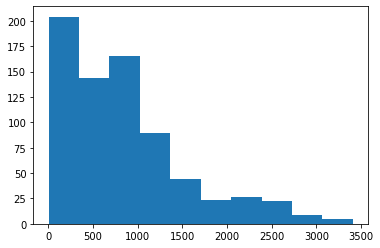

In [ ]:
plt.hist(data = bikerents_df_encoded, x = 'casual')

(array([ 14.,  44.,  79.,  80., 113., 144.,  85.,  71.,  57.,  44.]),
 array([  20. ,  712.6, 1405.2, 2097.8, 2790.4, 3483. , 4175.6, 4868.2,
        5560.8, 6253.4, 6946. ]),
 <a list of 10 Patch objects>)

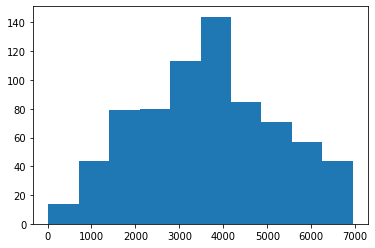

In [ ]:
plt.hist(data = bikerents_df_encoded, x = 'registered')

In [ ]:
# Log scaling of columns in bikerents_df_encoded
bikerents_df_encoded['casual'] = np.log(bikerents_df_encoded['casual'])

In [ ]:
bikerents_df_encoded.head()

,instant,dteday,temp,atemp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,holiday_0,holiday_1,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3
0,1,2011-01-01,0.344167,0.363625,0.805833,0.160446,5.802118,654,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0
1,2,2011-01-02,0.363478,0.353739,0.696087,0.248539,4.875197,670,801,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
2,3,2011-01-03,0.196364,0.189405,0.437273,0.248309,4.787492,1229,1349,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0
3,4,2011-01-04,0.200000,0.212122,0.590435,0.160296,4.682131,1454,1562,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0
4,5,2011-01-05,0.226957,0.229270,0.436957,0.186900,4.406719,1518,1600,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0


In [ ]:
bikerents_df_encoded.shape

(731, 41)

**Dimensionality reduction**

Principal Component Analysis

In [ ]:
pca = PCA()
pca.fit(bikerents_df_encoded.iloc[:, 2:])

PCA()

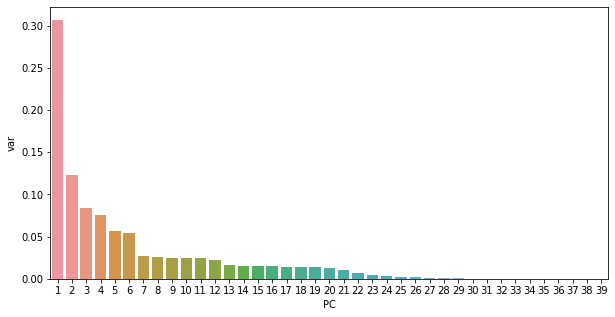

In [ ]:
variance_df = pd.DataFrame({'var' : pca.explained_variance_ratio_, 'PC' : [_ for _ in range(1, 40)]})
plt.figure(figsize = (10, 5))
sns.barplot(x = 'PC', y = 'var', data = variance_df)

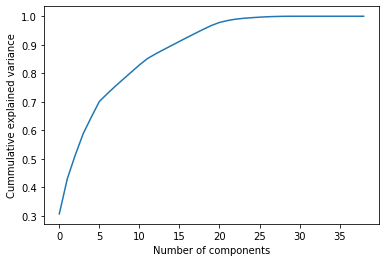

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.show()

The cummulative explained variance graph shows that 90% of the variance in the input data can be explained by just 15 variables as against the original 41 variables. Thus, we can reduce the dimensonality by nearly 60%

Singular Value Decomposition

In [ ]:
svd = TruncatedSVD(n_components = len(climate_df_imputed.columns)-1)
svd.fit(climate_df_imputed)

TruncatedSVD(n_components=8)

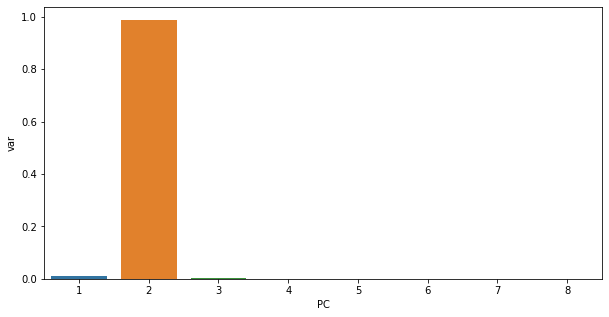

In [ ]:
variance_df = pd.DataFrame({'var' : svd.explained_variance_ratio_, 'PC' : [_ for _ in range(1, len(climate_df_fs.columns))]})
plt.figure(figsize = (10, 5))
sns.barplot(x = 'PC', y = 'var', data = variance_df)

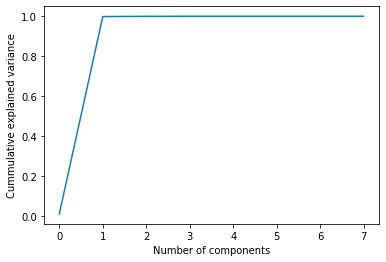

In [ ]:
plt.plot(np.cumsum(svd.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.show()

1 components out of 9 is sufficient to model the bikerents problem as it explains 100% of the variance in the dataset.